In [20]:
import pandas as pd
import numpy as np

In [7]:
# Load your uploaded CSV
df = pd.read_csv("ECH_2009-2020.csv", index_col=0, parse_dates=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_20840\1610733760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("ECH_2009-2020.csv", index_col=0, parse_dates=True)


In [11]:
df.head(5)

,Close,High,Low,Open,Volume
Price,,,,,
Ticker,ECH,ECH,ECH,ECH,ECH
Date,NaN,NaN,NaN,NaN,NaN
2009-12-14,36.48460388183594,36.63846237194658,36.05647546555473,36.19026368175762,212300
2009-12-15,36.35749816894531,36.51135919678961,36.29060406697977,36.29060406697977,122100
2009-12-16,36.39762496948242,36.79230617415169,36.324039948838816,36.79230617415169,201500


In [15]:
# Convert Open column to numeric (coerce errors to NaN)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')



In [16]:

# Drop any rows where Open is missing or non-numeric
df = df.dropna(subset=['Open'])

In [18]:


# Now compute Gamma safely
df['Gamma'] = (df['Open'].diff() > 0).astype(int)



In [19]:
# Drop the first row (has NaN from diff)
df = df.dropna()


In [21]:
# Rolling arithmetic and geometric means over 10 days
df['Open_roll_mean'] = df['Open'].rolling(window=10).mean()
df['Open_roll_geom'] = df['Open'].rolling(window=10).apply(lambda x: np.exp(np.mean(np.log(x))), raw=False)


In [22]:
# Dispersion Ratio
df['DR_10'] = df['Open_roll_mean'] / df['Open_roll_geom']

In [23]:
# Drop rows with NaN (from rolling)
df = df.dropna(subset=['DR_10'])

In [24]:
# Final feature set for modeling
features = df[['DR_10']]
target = df['Gamma']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [26]:
# Logistic regression classifier
clf = LogisticRegression()


In [27]:
# 10-fold cross-validation
scores = cross_val_score(clf, features, target, cv=10, scoring='accuracy')

In [28]:
# Results
print("Cross-validation accuracy per fold:", scores)
print("Average accuracy:", scores.mean())

Cross-validation accuracy per fold: [0.50396825 0.50396825 0.50396825 0.50396825 0.5        0.5
 0.5        0.5        0.5        0.5       ]
Average accuracy: 0.5015873015873016


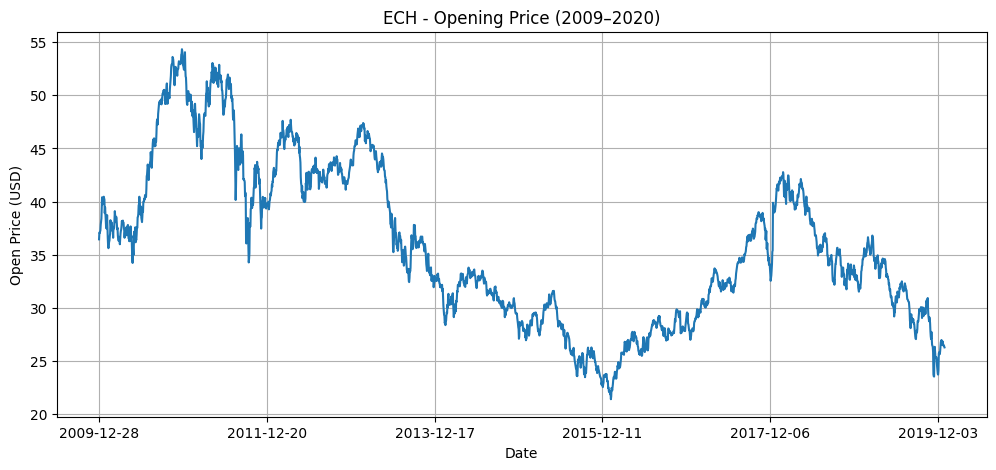

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df['Open'].plot()
plt.title("ECH - Opening Price (2009–2020)")
plt.xlabel("Date")
plt.ylabel("Open Price (USD)")
plt.grid(True)
plt.show()


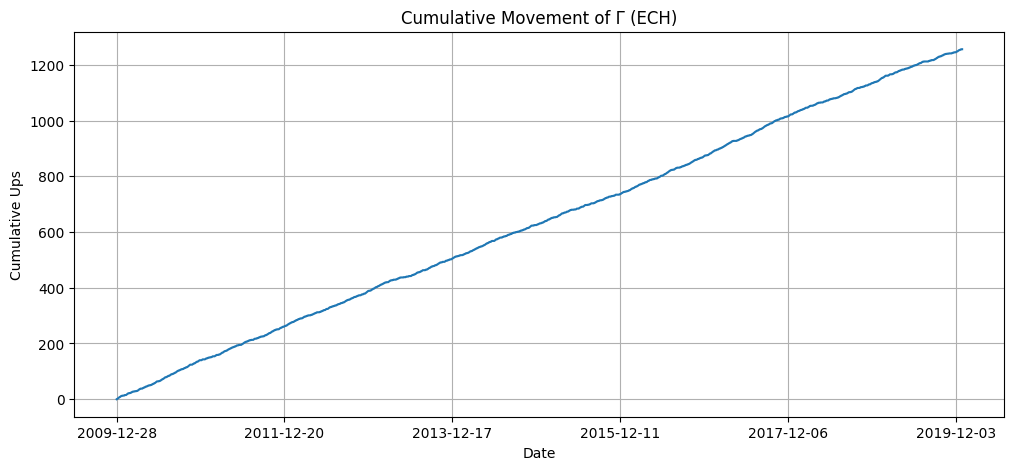

In [30]:
plt.figure(figsize=(12, 5))
df['Gamma'].cumsum().plot()
plt.title("Cumulative Movement of Γ (ECH)")
plt.xlabel("Date")
plt.ylabel("Cumulative Ups")
plt.grid(True)
plt.show()
